# GPU Enabling

In [ ]:
!pip install tensorflow-gpu==1.15.2
!pip install keras==2.3

!/usr/local/cuda/bin/nvcc --version
import tensorflow as tf
tf.__version__

!tar -xzvf drive/My\ Drive/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

import tensorflow as tf
tf.test.gpu_device_name()

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

     |████████████████████████████████| 411.0MB 42kB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 3.8MB 49.5MB/s 
     |████████████████████████████████| 512kB 57.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=bf32bde468fd2b6c97edf2cc453042b48c52dcb5f4c5fda5323f13893f78d01d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing i

# Implementation

In [ ]:
!cp "drive/My Drive/MothaProject/lsa64_raw.zip" "copy.zip"
!unzip copy.zip

Archive:  copy.zip
   creating: all/
  inflating: all/001_001_001.mp4     
  inflating: all/001_001_002.mp4     
  inflating: all/001_001_003.mp4     
  inflating: all/001_001_004.mp4     
  inflating: all/001_001_005.mp4     
  inflating: all/001_002_001.mp4     
  inflating: all/001_002_002.mp4     
  inflating: all/001_002_003.mp4     
  inflating: all/001_002_004.mp4     
  inflating: all/001_002_005.mp4     
  inflating: all/001_003_001.mp4     
  inflating: all/001_003_002.mp4     
  inflating: all/001_003_003.mp4     
  inflating: all/001_003_004.mp4     
  inflating: all/001_003_005.mp4     
  inflating: all/001_004_001.mp4     
  inflating: all/001_004_002.mp4     
  inflating: all/001_004_003.mp4     
  inflating: all/001_004_004.mp4     
  inflating: all/001_004_005.mp4     
  inflating: all/001_005_001.mp4     
  inflating: all/001_005_002.mp4     
  inflating: all/001_005_003.mp4     
  inflating: all/001_005_004.mp4     
  inflating: all/001_005_005.mp4     
  inflating: 

In [ ]:
import os
import numpy as np
import cv2
import pickle
from os.path import join, exists
import argparse
from tqdm import tqdm
import shutil
from collections import defaultdict

In [ ]:
dir = os.listdir("all")
count = defaultdict(int)


for i in dir:
	v = i.split("_")
	if len(v) == 3:
		outDir = "class_{}".format(v[0])
		count[v[0]] += 1
		c = count[v[0]]
		if c > 40:
			outDir = "splittedNew/test/"+outDir
		else:
			outDir = "splittedNew/train/"+outDir
		if not os.path.exists(outDir):
			os.makedirs(outDir)
		shutil.move("all/{}".format(i), "{}/{}".format(outDir, i))

In [ ]:
boundaries = [
    ([0, 120, 0], [140, 255, 100]),
    ([25, 0, 75], [180, 38, 255])
]


def handsegment(frame):
    lower, upper = boundaries[0]
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")
    mask1 = cv2.inRange(frame, lower, upper)

    lower, upper = boundaries[1]
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")
    mask2 = cv2.inRange(frame, lower, upper)

    mask = cv2.bitwise_or(mask1, mask2)
    output = cv2.bitwise_and(frame, frame, mask=mask)

    return output

In [ ]:
!rm -r /content/book
cl = 60
cap = cv2.VideoCapture("/content/splittedNew/train/class_060/060_005_001.mp4") 
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
lastFrame = None

outFile = f"/content/book/"+"{}_frame_{}.jpeg"
count = 0
      
while count < 101:
    ret, frame = cap.read()  
    ret, frame = cap.read()  
    if ret is False:
        break

    framename = outFile.format(str(cl),count)

    if not os.path.exists(framename):
        try:
          os.makedirs('/'.join(framename.split('/')[:-1]))
        except:
          pass

    cv2.imwrite(outFile.format(str(cl)+'_0',count), frame)
    frame = handsegment(frame)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    lastFrame = frame
    cv2.imwrite(framename, frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    count += 1

In [ ]:
!rm -r /content/frames

CATEGORIES = 20

def framesExtract(fldr):
  base = "/content/splittedNew/"+fldr+"/"
  gestures = os.listdir(base)
  for cl in gestures:
    if int(cl.split("_")[1]) > CATEGORIES:
      continue
    for v in os.listdir(base+"/"+cl):
      
      print("{}{}/{}".format(base,cl,v))
      cap = cv2.VideoCapture("{}{}/{}".format(base,cl,v)) 
      frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      lastFrame = None

      outFile = f"/content/frames/{fldr}"+"/{}/{}_frame_{}.jpeg"
      count = 0
            
      while count < 101:
          ret, frame = cap.read()  
          ret, frame = cap.read()  
          if ret is False:
              break

          framename = outFile.format(cl,v.split('.')[0],count)

          if not os.path.exists(framename):
              try:
                os.makedirs('/'.join(framename.split('/')[:-1]))
              except:
                pass
          frame = handsegment(frame)
          frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
          lastFrame = frame
          cv2.imwrite(framename, frame)

          if cv2.waitKey(1) & 0xFF == ord('q'):
              break
          count += 1

      while count < 101:
          framename = outFile.format(cl,v.split('.')[0],count)
          cv2.imwrite(framename, lastFrame)
          count += 1

      cap.release()
      cv2.destroyAllWindows()

# framesExtract("train")

In [ ]:
!curl -LO https://github.com/tensorflow/hub/raw/master/examples/image_retraining/retrain.py
!python3 retrain.py --bottleneck_dir=bottlenecks --summaries_dir=training_summaries/long --output_graph=retrained_graph.pb --output_labels=retrained_labels.txt --image_dir=frames/train

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0    325      0 --:--:-- --:--:-- --:--:--   324
100 55947  100 55947    0     0  93556      0 --:--:-- --:--:-- --:--:-- 93556

E1022 08:32:14.138398 140436084213632 retrain.py:997] WARNING: This tool is deprecated in favor of https://github.com/tensorflow/hub/tree/master/tensorflow_hub/tools/make_image_classifier

W1022 08:32:14.138616 140436084213632 module_wrapper.py:139] From retrain.py:916: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.


W1022 08:32:14.138848 140436084213632 module_wrapper.py:139] From retrain.py:918: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W1022 08:32:14.139196 140436084213632 module_wrapper.py:139] From retrain.py:167: The name tf.gfile.Walk is deprecated. Please use tf.io.gfile.walk instead.

I1022 

In [ ]:
!curl -LO https://raw.githubusercontent.com/hthuwal/sign-language-gesture-recognition/master/predict_spatial.py
!python3 predict_spatial.py retrained_graph.pb frames/train/ --batch=100

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5250  100  5250    0     0  35472      0 --:--:-- --:--:-- --:--:-- 35472

Predicting on frame of frames/train/class_018

  0% 0/41 [00:00<?, ?it/s]WARNING:tensorflow:From predict_spatial.py:29: The name tf.read_file is deprecated. Please use tf.io.read_file instead.



100% 41/41 [04:28<00:00,  6.54s/it]
Predicting on frame of frames/train/class_014

100% 41/41 [03:12<00:00,  4.69s/it]
Predicting on frame of frames/train/class_004

100% 41/41 [03:23<00:00,  4.96s/it]
Predicting on frame of frames/train/class_016

100% 41/41 [03:59<00:00,  5.84s/it]
Predicting on frame of frames/train/class_003

100% 41/41 [04:37<00:00,  6.78s/it]
Predicting on frame of frames/train/class_020

100% 41/41 [05:07<00:00,  7.49s/it]
Predicting on frame of frames/train/class_009

100% 41/41 [05:26<00:00,  7.97s/it]
Predicting on frame of frames/tr

In [ ]:
from collections import deque
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import tensorflow as tf

def get_data(input_data_dump, num_frames_per_video, labels, ifTrain):
  X, y = [], []
  temp_list = deque()

  with open(input_data_dump,'rb') as fin:
    frames = pickle.load(fin)

    for i,frame in enumerate(frames):
      features = frame[0]
      actual = frame[1].lower()

      actual = labels[actual]

      if len(temp_list) == num_frames_per_video-1:
        temp_list.append(features)
        flat = list(temp_list)
        X.append(np.array(flat))
        y.append(actual)
        temp_list.clear()
      else:
        temp_list.append(features)
        continue

  print("Class Name\tNumeric Label")
  for key in labels:
    print("%s\t\t%d" % (key, labels[key]))

  X = np.asarray(X)
  y = np.asarray(y)

  print("Dataset shape: ", X.shape)

  y = np.eye(len(labels))[y]

  if ifTrain:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
  else:
    return X, y


def get_network(frames,input_size,num_classes):
  net = tf.keras.models.Sequential()
  net.add(tf.keras.layers.InputLayer(input_shape=[frames, input_size]))
  net.add(tf.keras.layers.LSTM(256, dropout=0.2))
  net.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

  net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

  return net



Class Name	Numeric Label
class_001		0
class_002		1
class_003		2
class_004		3
class_005		4
class_006		5
class_007		6
class_008		7
class_009		8
class_010		9
class_011		10
class_012		11
class_013		12
class_014		13
class_015		14
class_016		15
class_017		16
class_018		17
class_019		18
class_020		19
Dataset shape:  (800, 101, 20)

No previous checkpoints of model_sign.h5 exist
(640, 101, 20)
Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 2s 4ms/sample - loss: 2.9209 - acc: 0.3531 - val_loss: 2.7825 - val_acc: 0.9812
Epoch 2/100
640/640 [==============================] - 1s 1ms/sample - loss: 2.6595 - acc: 0.8125 - val_loss: 2.4505 - val_acc: 1.0000
Epoch 3/100
640/640 [==============================] - 1s 1ms/sample - loss: 2.1512 - acc: 0.7375 - val_loss: 1.6856 - val_acc: 0.6938
Epoch 4/100
640/640 [==============================] - 1s 1ms/sample - loss: 1.5784 - acc: 0.6938 - val_loss: 1.0126 - val_acc: 0.9250
Epoch 5/100
640/640 [====

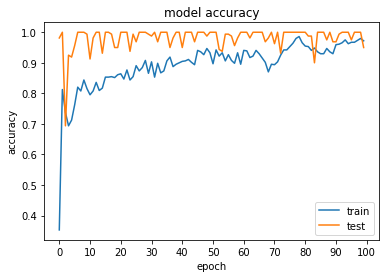

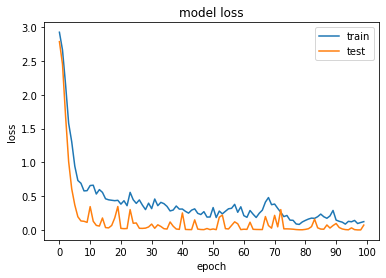

Do you wanna save the model and overwrite? y or n: y


In [ ]:
# from rnn_utils import get_network_wide, get_data
import argparse
import tensorflow as tf
import os
import matplotlib.pyplot as plt



def load_labels(label_file):
    label = {}
    count = 0
    proto_as_ascii_lines = tf.gfile.GFile(label_file).readlines()
    for l in proto_as_ascii_lines:
        label[l.strip()] = count
        count += 1
    return label


def start_train(input_data='/content/predicted-frames-final_result-train.pkl', num_frames_per_video=101, batch_size=128, labels=load_labels('/content/retrained_labels.txt'), model_file=None):
    # Get our data
    X_train, X_test, y_train, y_test = get_data(input_data, num_frames_per_video, labels, True)

    num_classes = len(labels)
    size_of_each_frame = X_train.shape[2]

    # Train the model
    try:
        model = tf.keras.models.load_model(model_file)
        print("\nModel already exists! Loading it")
        print("Model Loaded")
    except Exception:
        model = get_network(num_frames_per_video, size_of_each_frame, num_classes)
        print("\nNo previous checkpoints of %s exist" % (model_file))
    print(X_train.shape)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=batch_size,
              epochs=100)

    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xticks(np.arange(0, 101, step=10),np.arange(0,101,step=10))
    plt.legend(['train', 'test'], loc='lower right')
    plt.savefig('accuracy.png')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.xticks(np.arange(0, 101, step=10),np.arange(0,101,step=10))
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig('loss.png')
    plt.show()

    # Save it.
    x = input("Do you wanna save the model and overwrite? y or n: ")
    if(x.strip().lower() == "y"):
        model.save(model_file)


start_train(model_file='model_sign.h5')

In [ ]:
# !cp /content/retrained_labels.txt /content/drive/My\ Drive/MothaProject/20_classes/retrained_labels.txt
# !cp /content/retrained_graph.pb /content/drive/My\ Drive/MothaProject/20_classes/retrained_graph.pb
# !cp /content/model_sign.h5 /content/drive/My\ Drive/MothaProject/20_classes/model_sign.h5
# !cp /content/predicted-frames-final_result-train.pkl /content/drive/My\ Drive/MothaProject/20_classes/predicted-frames-final_result-train.pkl
!cp -r /content/frames/test /content/drive/My\ Drive/MothaProject/20_classes/frames/test

In [ ]:
!cp /content/drive/MY\ Drive/MothaProject/20_classes/retrained_labels.txt /content/retrained_labels.txt 
!cp /content/drive/MY\ Drive/MothaProject/20_classes/predicted-frames-final_result-train.pkl /content/predicted-frames-final_result-train.pkl

cp: cannot stat '/content/drive/MY Drive/MothaProject/20_classes/retrained_labels.txt': No such file or directory
cp: cannot stat '/content/drive/MY Drive/MothaProject/20_classes/predicted-frames-final_result-train.pkl': No such file or directory


In [ ]:
framesExtract("test")
!python3 predict_spatial.py retrained_graph.pb frames/test/ --test --batch=100
def main(input_data='/content/predicted-frames-final_result-test.pkl', num_frames_per_video=101, batch_size=100, labels=load_labels('/content/retrained_labels.txt'), model_file=None):
    # Get our data.
    X,Y = get_data(input_data, num_frames_per_video, labels, False)
    print(X.shape)
    num_classes = len(labels)
    size_of_each_frame = X.shape[2]

    # Get our network.
    # model = get_network(num_frames_per_video, size_of_each_frame, num_classes)
    model = tf.keras.models.load_model(model_file)
    # Train the model.
    # model = tflearn.DNN(net, tensorboard_verbose=0)

    # model.load(model_file)
    predictions = model.predict(X)
    predictions = np.array([np.argmax(pred) for pred in predictions])
    Y = np.array([np.argmax(each) for each in Y])

    # Writing predictions and gold labels to file
    rev_labels = dict(zip(list(labels.values()), list(labels.keys())))
    print(rev_labels)
    with open("result.txt", "w") as f:
        f.write("gold, pred\n")
        for a, b in zip(Y, predictions):
            f.write("%s %s\n" % (rev_labels[a], rev_labels[b]))

    acc = 100 * np.sum(predictions == Y) / len(Y)
    print("Accuracy: ", acc)

main(model_file='model_sign.h5')

/content/splittedNew/test/class_018/018_003_003.mp4
/content/splittedNew/test/class_018/018_004_004.mp4
/content/splittedNew/test/class_018/018_007_002.mp4
/content/splittedNew/test/class_018/018_010_002.mp4
/content/splittedNew/test/class_018/018_008_001.mp4
/content/splittedNew/test/class_018/018_007_003.mp4
/content/splittedNew/test/class_018/018_010_003.mp4
/content/splittedNew/test/class_018/018_010_001.mp4
/content/splittedNew/test/class_018/018_003_004.mp4
/content/splittedNew/test/class_018/018_009_004.mp4
/content/splittedNew/test/class_014/014_002_003.mp4
/content/splittedNew/test/class_014/014_002_002.mp4
/content/splittedNew/test/class_014/014_009_002.mp4
/content/splittedNew/test/class_014/014_004_004.mp4
/content/splittedNew/test/class_014/014_009_005.mp4
/content/splittedNew/test/class_014/014_001_001.mp4
/content/splittedNew/test/class_014/014_008_003.mp4
/content/splittedNew/test/class_014/014_007_005.mp4
/content/splittedNew/test/class_014/014_007_002.mp4
/content/spl

In [ ]:
!python3 predict_spatial.py retrained_graph.pb frames/test/ --test --batch=100


Predicting on frame of frames/test/class_002

  0% 0/11 [00:00<?, ?it/s]['frames/test/class_002/002_007_002_frame_16.jpeg', 'frames/test/class_002/002_005_003_frame_23.jpeg', 'frames/test/class_002/002_004_002_frame_1.jpeg', 'frames/test/class_002/002_009_004_frame_42.jpeg', 'frames/test/class_002/002_004_002_frame_11.jpeg', 'frames/test/class_002/002_004_005_frame_77.jpeg', 'frames/test/class_002/002_005_005_frame_41.jpeg', 'frames/test/class_002/002_005_003_frame_7.jpeg', 'frames/test/class_002/002_005_005_frame_37.jpeg', 'frames/test/class_002/002_005_005_frame_78.jpeg', 'frames/test/class_002/002_004_005_frame_100.jpeg', 'frames/test/class_002/002_003_002_frame_71.jpeg', 'frames/test/class_002/002_005_005_frame_53.jpeg', 'frames/test/class_002/002_005_005_frame_80.jpeg', 'frames/test/class_002/002_009_001_frame_81.jpeg', 'frames/test/class_002/002_005_005_frame_52.jpeg', 'frames/test/class_002/002_004_002_frame_63.jpeg', 'frames/test/class_002/002_003_002_frame_63.jpeg', 'frames/t

In [ ]:
frame = '/content/001_008_001_frame_92.jpeg'
x = tf.read_file(frame, "file_reader")
image_reader = tf.image.decode_jpeg(x, channels=3, name="jpeg_reader")
m = tf.cast(image_reader, tf.float32)
x,image_reader
print(m)

import cv2
y = cv2.imread(frame)
tensor = tf.convert_to_tensor(y, dtype=tf.uint8)
tensor

Tensor("Cast:0", shape=(?, ?, 3), dtype=float32)


<tf.Tensor 'Const_1:0' shape=(1080, 1920, 3) dtype=uint8>

type: gold, pred



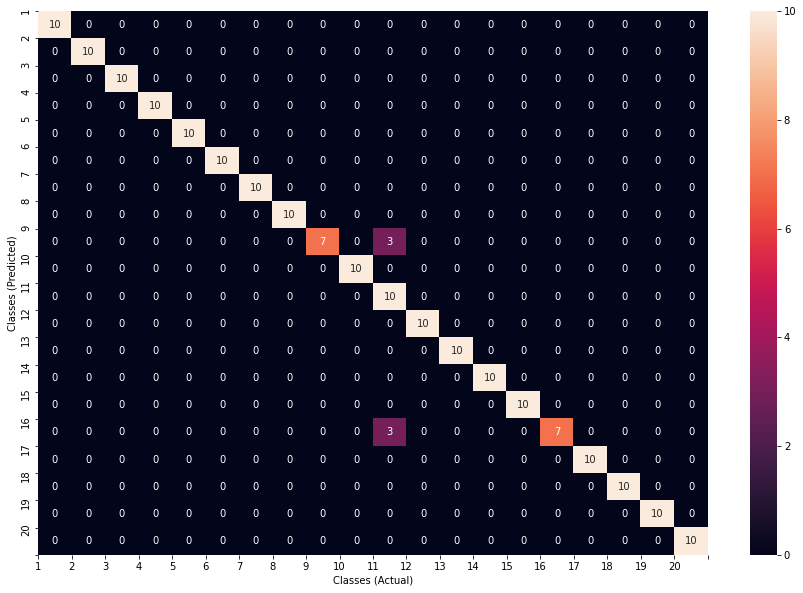

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_orig,y_pred = [],[]

with open('result.txt') as f:
  print('type:',f.readline())
  for s in f.readlines():
    x1,x2 = s.split(' ')
    y_orig.append(x1)
    y_pred.append(x2[:-1])

cf = confusion_matrix(y_orig,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(cf,ax=ax, annot=True)
plt.xlabel('Classes (Actual)')
plt.ylabel('Classes (Predicted)')
plt.xticks(np.arange(0, 21, step=1),np.arange(1,21,step=1))
plt.yticks(np.arange(0, 21, step=1),np.arange(1,21,step=1))
plt.savefig('confusion.png')

In [ ]:
print(classification_report(y_orig,y_pred))

              precision    recall  f1-score   support

   class_001       1.00      1.00      1.00        10
   class_002       1.00      1.00      1.00        10
   class_003       1.00      1.00      1.00        10
   class_004       1.00      1.00      1.00        10
   class_005       1.00      1.00      1.00        10
   class_006       1.00      1.00      1.00        10
   class_007       1.00      1.00      1.00        10
   class_008       1.00      1.00      1.00        10
   class_009       1.00      0.70      0.82        10
   class_010       1.00      1.00      1.00        10
   class_011       0.62      1.00      0.77        10
   class_012       1.00      1.00      1.00        10
   class_013       1.00      1.00      1.00        10
   class_014       1.00      1.00      1.00        10
   class_015       1.00      1.00      1.00        10
   class_016       1.00      0.70      0.82        10
   class_017       1.00      1.00      1.00        10
   class_018       1.00    